Author: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from metadPy.sdt import rates, dprime, criterion
from metadPy.utils import trials2counts, discreteRatings
from scipy.stats import norm
import seaborn as sns
import numpy as np
import pingouin as pg
from systole.detection import oxi_peaks, rr_artefacts
from plotting import raincloud

sns.set_context('talk')

Import summary statistics from behavioral data

In [5]:
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
group_df = pd.read_csv(path + '/data/Del1_psychophysics.txt')
group_df['Modality'] = group_df['Condition']

# Psychophysic parameters of the task

## Psychometric functions parameters

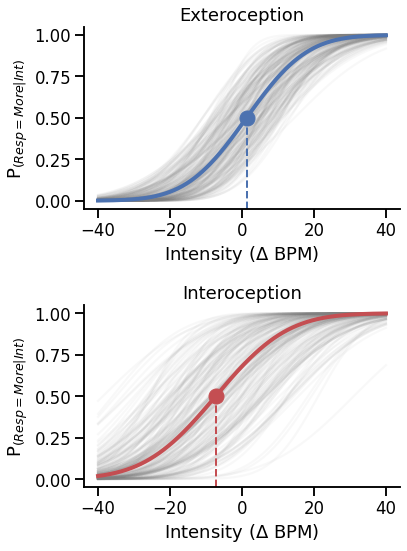

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(6, 8))
for i, modality, col in zip((0, 1), ['Extero', 'Intero'], ['#4c72b0', '#c44e52']):
    threshold, slope = [], []
    for subject in group_df.Subject.unique():
        threshold.append(group_df.Threshold[(group_df.Modality == modality) & (group_df.Subject == subject)].values)
        slope.append(group_df.Slope[(group_df.Modality == modality) & (group_df.Subject == subject)].values)

        # Plot Psi estimate of psychometric function
        axs[i].plot(np.linspace(-40, 40, 500), 
                (norm.cdf(np.linspace(-40, 40, 500), loc=threshold[-1], scale=slope[-1])),
                '-', color='gray', alpha=.05)
        axs[i].set_ylabel('P$_{(Resp = More|Int)}$')
        axs[i].set_xlabel('Intensity ($\Delta$ BPM)')
        axs[i].set_title(f'{modality}ception')
    axs[i].plot(np.linspace(-40, 40, 500), 
            (norm.cdf(np.linspace(-40, 40, 500), loc=np.array([threshold]).mean(), scale=np.array([slope]).mean())),
            '-', color=col, linewidth=4)
    axs[i].plot(np.array([threshold]).mean(), 0.5, 'o', color=col, markersize=15)
    axs[i].axvline(x=np.array([threshold]).mean(), ymin=0, ymax=0.5, linestyle='--', color=col, linewidth=2)
plt.tight_layout()
sns.despine()
plt.savefig(path + '/figures/Fig2_psychometric.svg', dpi=600)

## Threshold and slope parameters

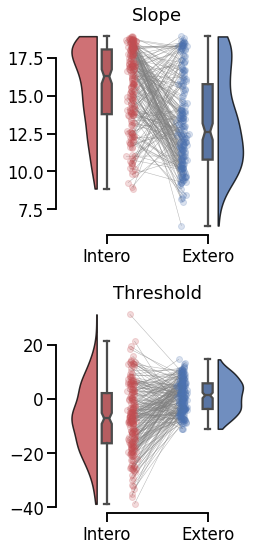

In [7]:
sns.set_context('talk')
fig, axs = plt.subplots(2, 1, figsize=(4, 8))
axs = axs.ravel()
for i, metric in enumerate(['Slope', 'Threshold']):
    raincloud(data=group_df, x='Modality', y=metric, ax=axs[i], palette=['#c44e52', '#4c72b0'])
    axs[i].set_title(metric)
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')
plt.tight_layout()
sns.despine(trim=10)
plt.savefig(path + '/figures/Fig2_threshold_slope.svg', dpi=600)

In [8]:
pg.pairwise_ttests(data=group_df, dv='Threshold', within='Modality', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Intero,Extero,True,True,-9.617525,207.0,two-sided,2.456813e-18,2.008e+15,-0.881174


In [9]:
pg.pairwise_ttests(data=group_df, dv='Slope', within='Modality', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Intero,Extero,True,True,8.321704,207.0,two-sided,1.163816e-14,5.102e+11,0.84131
